## Data Summary

### Read in Data

In [ ]:
sdata = sd.read_zarr("/content/drive/MyDrive/209B/UC6_I.zarr/UC6_I.zarr")


In [ ]:
sdata

SpatialData object, with associated Zarr store: /content/drive/.shortcut-targets-by-id/1gGIHAbOd2Iz7voASC_n_CSdgasqWWIaI/209B/UC6_I.zarr/UC6_I.zarr
├── Images
│     ├── 'HE_nuc_original': DataArray[cyx] (1, 20000, 20992)
│     └── 'HE_original': DataArray[cyx] (3, 20000, 20992)
└── Tables
      ├── 'anucleus': AnnData (223790, 460)
      └── 'cell_id-group': AnnData (308924, 0)
with coordinate systems:
    ▸ 'global', with elements:
        HE_nuc_original (Images), HE_original (Images)

### Visualize original H&E image

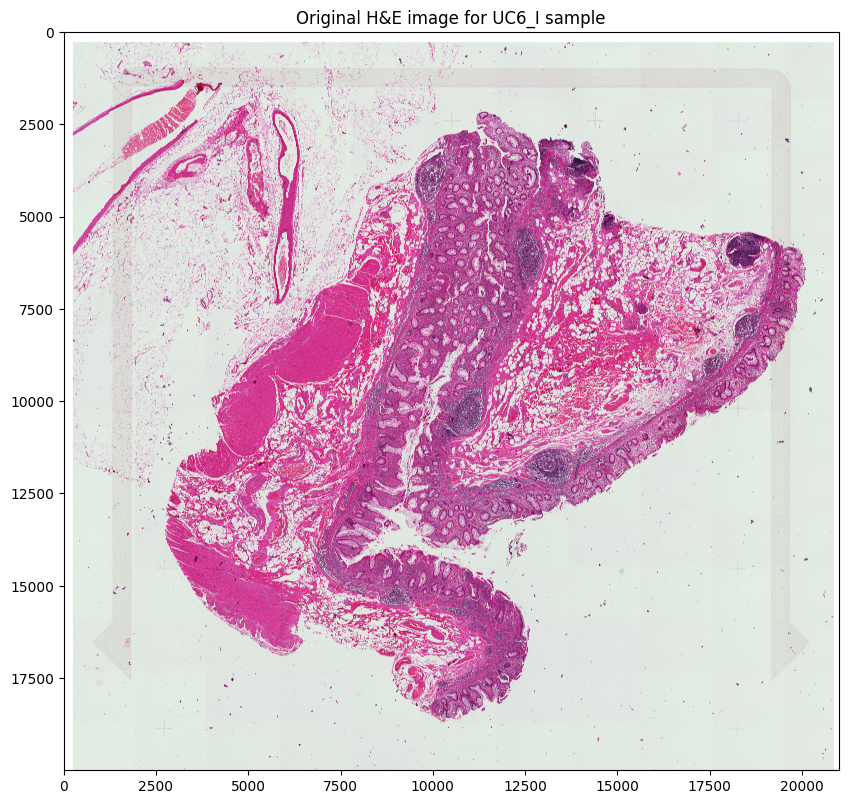

In [ ]:
plt.figure(figsize=(10, 10))
transpose_image = np.transpose(sdata.images['HE_original'].to_numpy(), (1, 2, 0))
plt.imshow(transpose_image)
plt.title("Original H&E image for UC6_I sample")
plt.show()

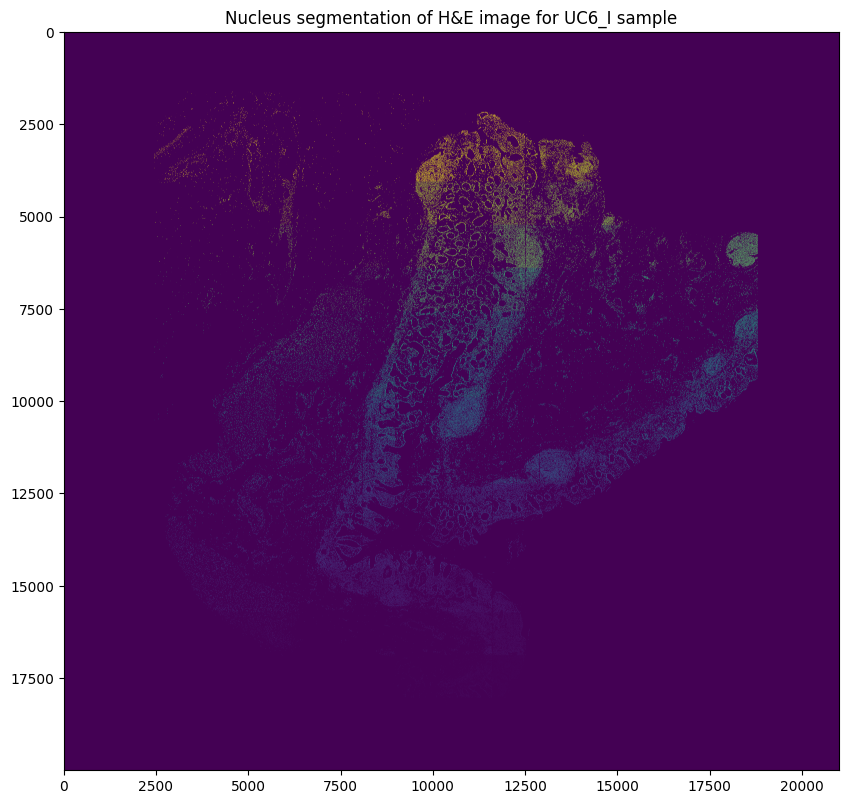

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(sdata.images['HE_nuc_original'].to_numpy()[0,:,:])
plt.title("Nucleus segmentation of H&E image for UC6_I sample")
plt.show()

### Generate summary statistics original H&E image and H&E image overlaid with nucleus annotations

In [ ]:
mean_val = transpose_image.mean().item()
max_val = transpose_image.min().item()
min_val = transpose_image.max().item()
dtype_val = transpose_image.dtype

print("Statistics for 'HE_original'")
print(f"Mean: {mean_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Data type: {dtype_val}")

Statistics for 'HE_original'
Mean: 7457.381393981041
Min: 431986
Max: 0
Data type: uint32


In [127]:
mean_val = transpose_image.mean().item()
min_val = transpose_image.min().item()
max_val = transpose_image.max().item()
dtype_val = transpose_image.dtype

print("Statistics for 'HE_nuc_original'")
print(f"Mean: {mean_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Data type: {dtype_val}")

Statistics for 'HE_nuc_original'
Mean: 201.75854769832952
Min: 13
Max: 255
Data type: uint8


In [ ]:
print("Image resolution is",transpose_image.shape[0]*transpose_image.shape[1], "pixels")

Image resolution is 419840000 pixels


### Visualize RGB channel distributions

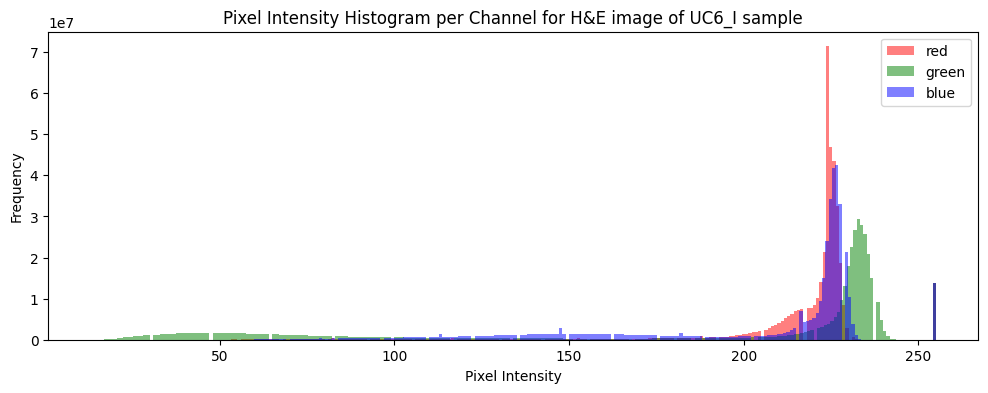

In [ ]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12, 4))

for i in range(3):
    plt.hist(sdata.images['HE_original'][i].values.flatten(), bins=256, alpha=0.5, label=colors[i], color=colors[i])

plt.title("Pixel Intensity Histogram per Channel for H&E image of UC6_I sample")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Explore spatial transcriptomics data

In [ ]:
print(sdata.tables["anucleus"].layers["counts"].shape)
print(sdata.tables["anucleus"].layers["counts"])

(223790, 460)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 0 4 ... 0 0 0]]


### Visualize distribution of total gene counts in cells

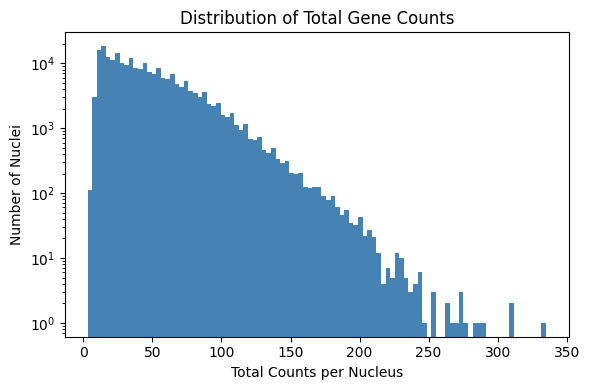

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import issparse

counts = sdata.tables["anucleus"].layers["counts"]

# sum for each gene
total_counts = counts.sum(axis=1)

plt.figure(figsize=(6, 4))
plt.hist(total_counts, bins=100, color="steelblue")
plt.xlabel("Total Counts per Nucleus")
plt.ylabel("Number of Nuclei")
plt.title("Distribution of Total Gene Counts")
plt.yscale("log")
plt.tight_layout()
plt.show()


### Visualize top 20 highly expressed genes

<ipython-input-51-978c8f0194f9>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xticks(range(20), var_names[top_genes_idx], rotation=45)


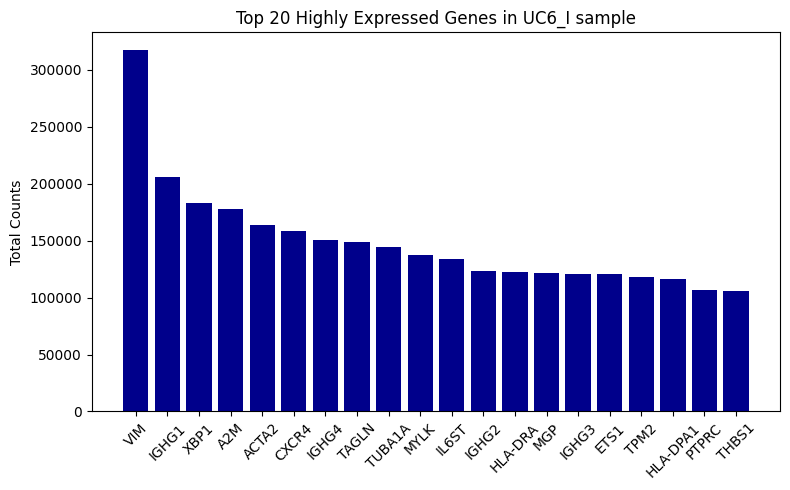

In [ ]:
gene_sums = sdata.sum(axis=0)
var_names = sdata.tables["anucleus"].var["gene_symbols"]
top_genes_idx = np.argsort(gene_sums)[-20:][::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(20), gene_sums[top_genes_idx], color="darkblue")
plt.xticks(range(20), var_names[top_genes_idx], rotation=45)
plt.ylabel("Total Counts")
plt.title("Top 20 Highly Expressed Genes in UC6_I sample")
plt.tight_layout()
plt.show()

### Generate summary statistics for spatial transcriptomics data

In [129]:
import numpy as np
from scipy.sparse import issparse

counts = sdata.tables["anucleus"].layers["counts"]

if issparse(counts):
    mean_val = counts.mean()
    max_val = counts.max()
    min_val = counts.min()
    dtype_val = counts.dtype
else:
    mean_val = np.mean(counts)
    max_val = np.max(counts)
    min_val = np.min(counts)
    dtype_val = counts.dtype

# Display
print("Stats for anucleus.layers['counts']:")
print(f"Mean: {mean_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Data type: {dtype_val}")

Stats for anucleus.layers['counts']:
Mean: 0.0995048055533429
Min: 0
Max: 43
Data type: int64
